In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('darkgrid')
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_csv('/content/sample_data/stars.csv')

In [ ]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.shape

(240, 7)

In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

In [ ]:
df.isna().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [ ]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

**Box Plot**

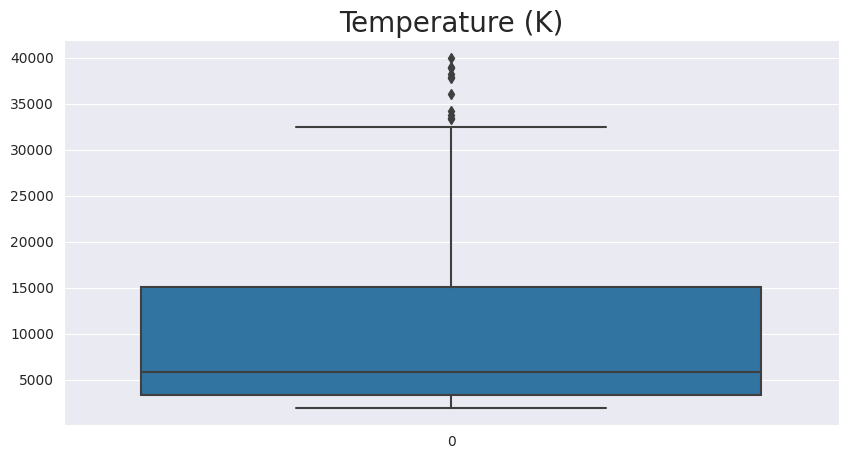

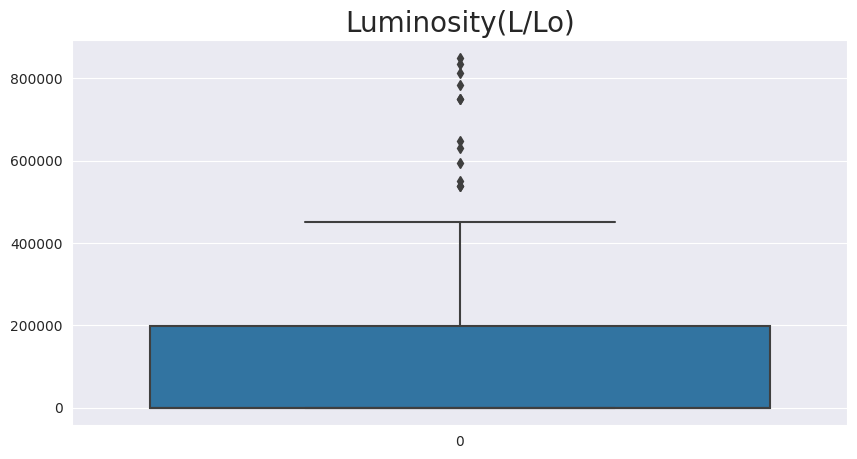

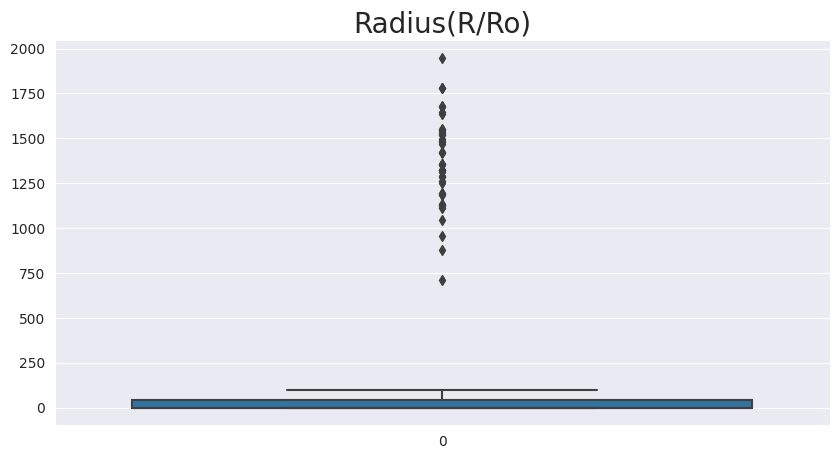

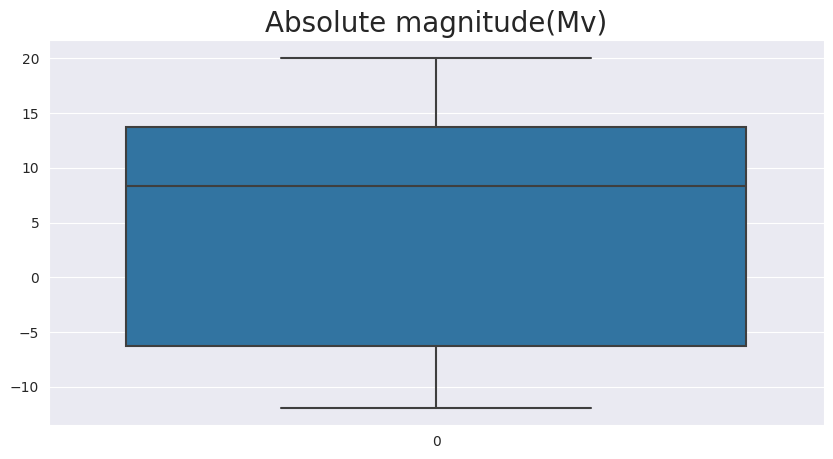

In [ ]:
for feature in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[feature])
    plt.title(feature, fontsize=20)

**Distribution Plot**

<Figure size 1000x500 with 0 Axes>

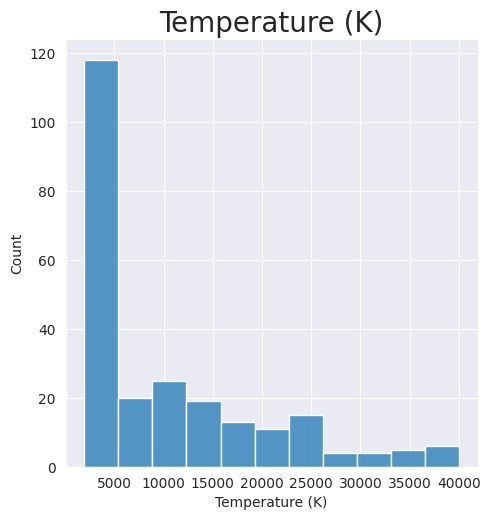

<Figure size 1000x500 with 0 Axes>

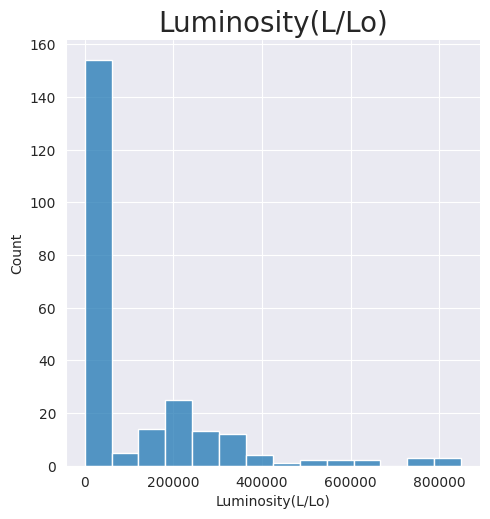

<Figure size 1000x500 with 0 Axes>

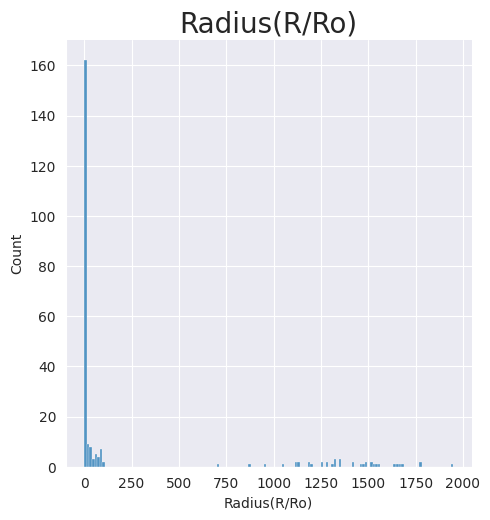

<Figure size 1000x500 with 0 Axes>

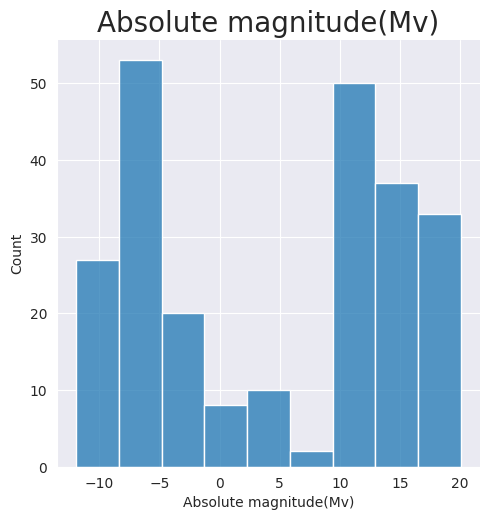

In [ ]:
for feature in ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']:
    plt.figure(figsize=(10, 5));
    sns.displot(df[feature]);
    plt.title(feature, fontsize=20);

In [ ]:
star_color_label = {value: key for key, value in enumerate(df['Star color'].unique())}
spec_class_label = {value: key for key, value in enumerate(df['Spectral Class'].unique())}

df['Star color'] = df['Star color'].map(star_color_label)
df['Spectral Class'] = df['Spectral Class'].map(spec_class_label)

In [ ]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']].values
y = df[['Star type']].values

**Correlation Matrix**

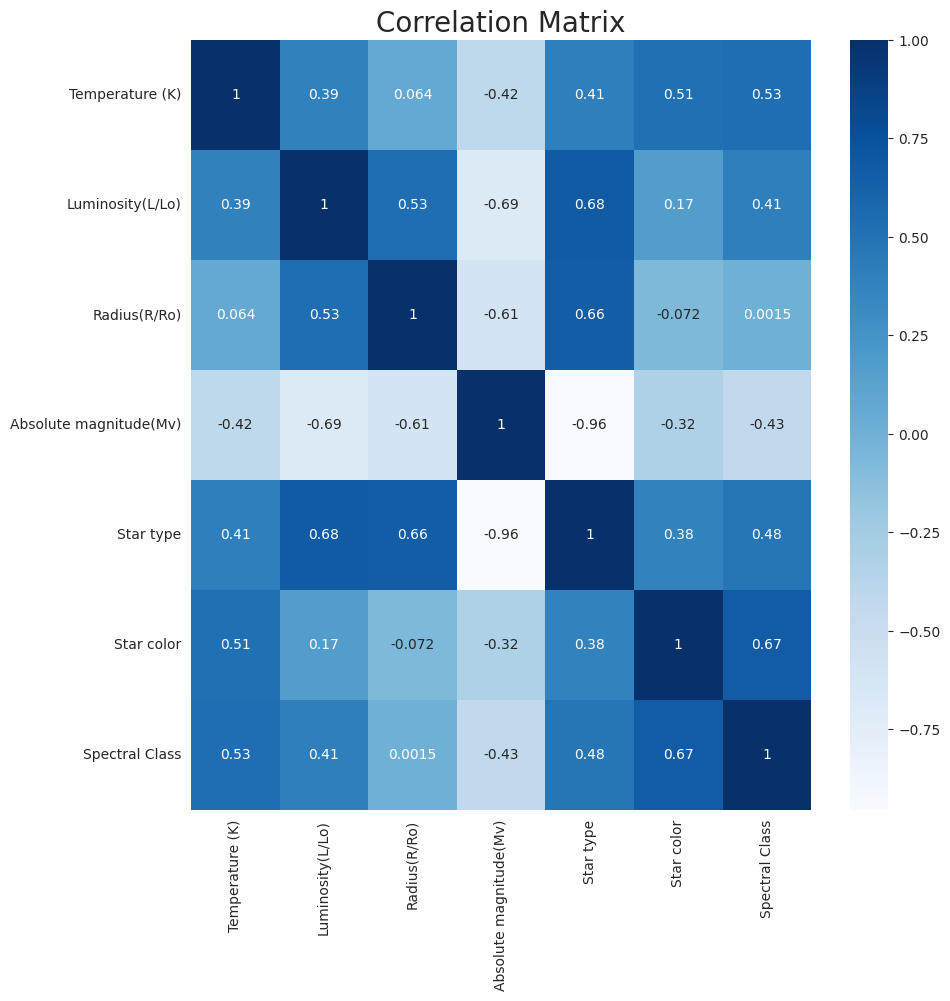

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "Blues", annot=True);
plt.title('Correlation Matrix', fontsize=20);

**Training Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print("Xtrain shape: ", X_train.shape)
print("Xtest shape: ", X_test.shape)

Xtrain shape:  (192, 6)
Xtest shape:  (48, 6)


In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = lg.predict(X_test)

In [ ]:
y_test = y_test.reshape(48,)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

----------

Confusion Matrix: 



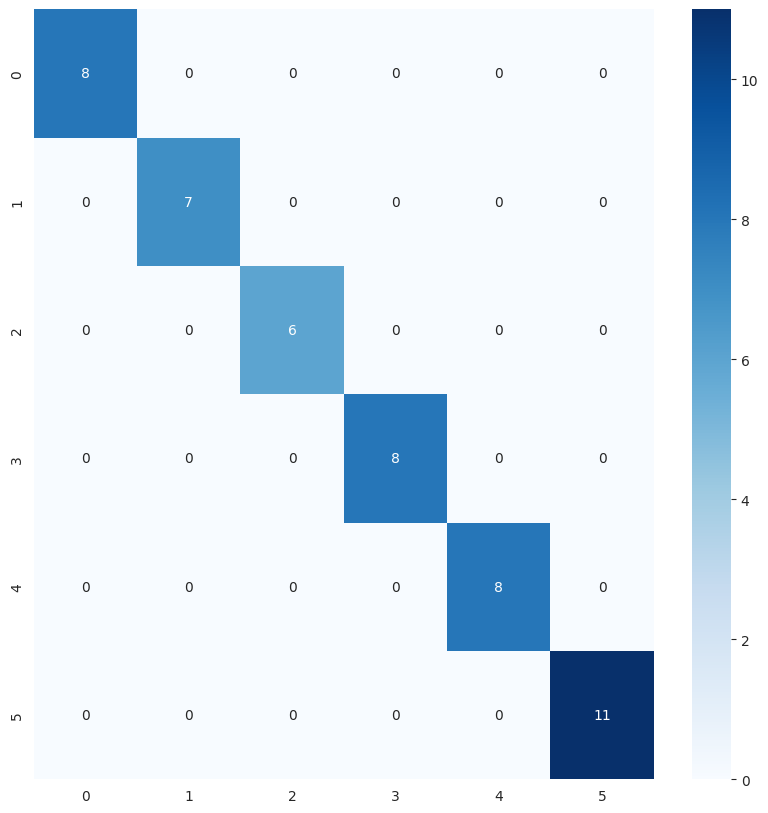

In [ ]:
print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 10)
print()

print("Confusion Matrix: \n")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), cmap="Blues" , annot=True);



**SVM**

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.27      1.00      0.43         9
           2       0.43      0.33      0.38         9
           3       0.00      0.00      0.00        12
           4       0.36      0.50      0.42        10
           5       0.17      0.11      0.13         9

    accuracy                           0.30        60
   macro avg       0.20      0.32      0.23        60
weighted avg       0.19      0.30      0.21        60

----------

Confusion Matrix: 



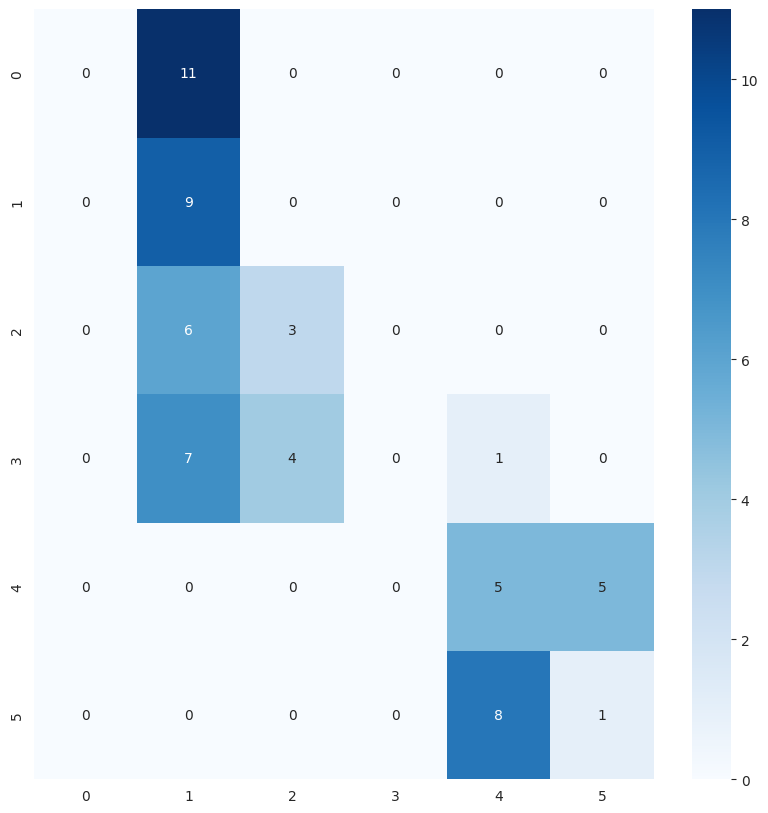

In [ ]:
print('Classification Report: \n', classification_report(y_test, svc_pred))
print("-" * 10)
print()

print("Confusion Matrix: \n")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, svc_pred), cmap="Blues" , annot=True);
